## Importing libraries

NOTE: The following images are blurred to protect the confidentiality of the images.

In [103]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt


images = []
root= "./houses_roof/"
files = os.listdir(root)

for filename in files:
    images.append(cv2.imread(f"{root}{filename}", cv2.IMREAD_GRAYSCALE))

# Resize images and show them side by side

41

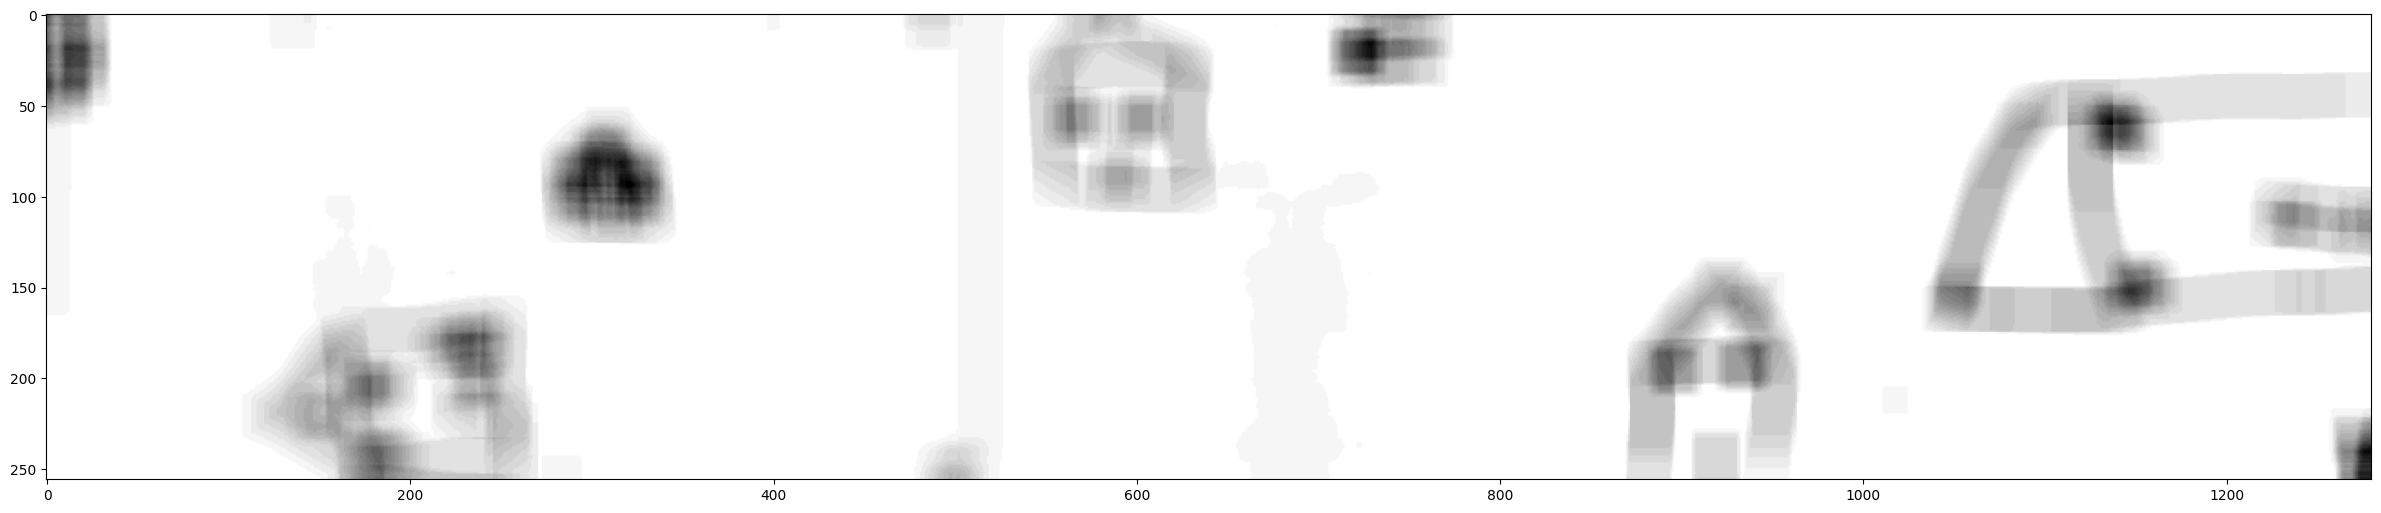

In [104]:
resized_imgs = []
plt.rcParams['figure.figsize'] = [30, 30]

for i in images:
  if i is None:
    continue
  else:
    resized = cv2.resize(i, (256,256), interpolation = cv2.INTER_AREA)  
    resized_imgs.append(resized)

plt.imshow(cv2.blur(np.hstack(resized_imgs[15:20]), (25,25)), cmap="gray")
len(resized_imgs)

In [105]:
def roof_or_noRoof(img_original):
  
  def square_cross_kernel(size: int) -> np.ndarray:
   
    if size % 2 == 0:
      raise ValueError("Kernel size should be an odd number.")

    kernel = np.zeros(shape=(size, size), dtype=np.uint8)

    mid_idx = int(np.floor(size/2))
    kernel[mid_idx, :] = 1
    kernel[:, mid_idx] = 1
    return kernel  
  
  img_gray = img_original.copy()
  kernel = square_cross_kernel(3)
  _, thresh = cv2.threshold(img_gray, 240, 255, cv2.THRESH_BINARY) # applies binary thresholding
   
  erode = lambda img_x, k_y : cv2.morphologyEx(img_x, op=cv2.MORPH_ERODE, kernel=k_y)
  dilate = lambda img_x, k_y : cv2.morphologyEx(img_x, op=cv2.MORPH_DILATE, kernel=k_y)
      

  # apply gaussian filter with kernel size 13x13 
  # then apply edge detection
  edges = cv2.Canny(image=thresh, threshold1=50, threshold2=220)

  # apply dilation two times on the extracted edges using kernel 3x3  
  for i in range(2):
    edges = dilate(edges, kernel)

  # find contours
  contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  approx_list = []
  
  # contour approximation
  for i in contours:
    peri = cv2.arcLength(i, True)
    approx = cv2.approxPolyDP(i, 0.04 *peri, True)
    approx_list.append(approx)
  
  classification = []
  for i, cnts in enumerate(approx_list):
    
  # cv2.boundingRect(cnts) finds the boundaries of a contour as a rectangle
  # i wanted to narrow down the unnecessary small contours that it detects 
      [x,y,w,h] = cv2.boundingRect(cnts)
      size = w*h/256 # normalize size
      if (size > 11):
        if len(cnts) >= 4 and len(cnts) < 5: 
          classification.append(1)
        else:
          classification.append(2)
  return classification

Total of test images

In [106]:
len(resized_imgs)

41

[[2], [2], [1], [2], [1], [2], [2], [], [], [2]]


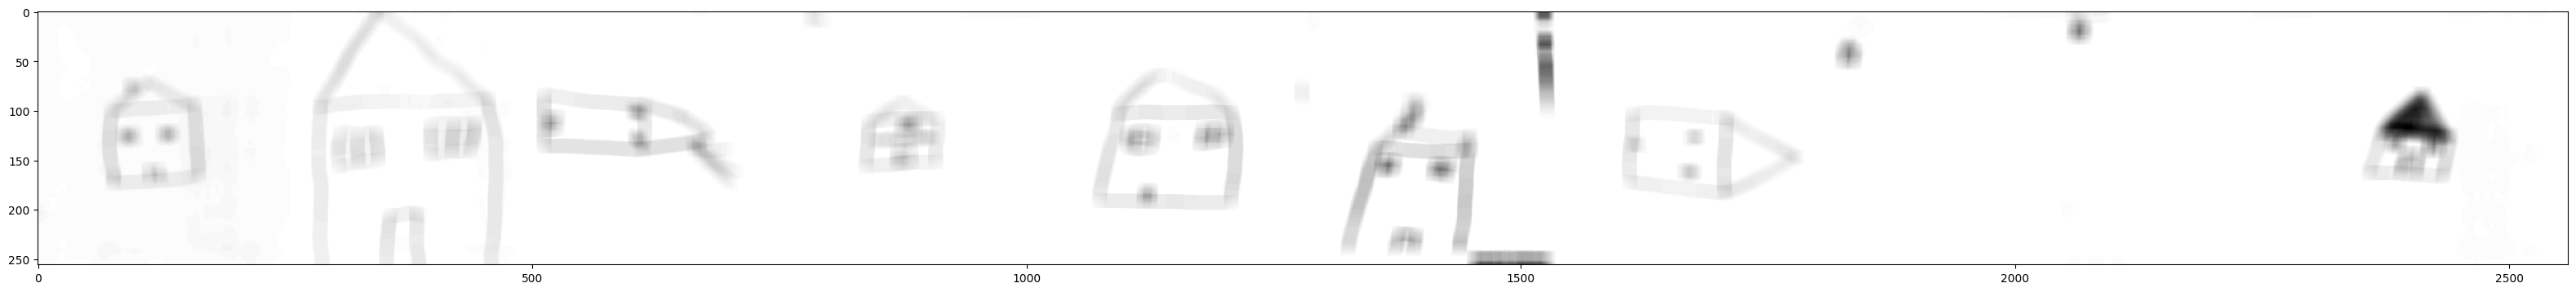

In [144]:
x = 0
plt.rcParams['figure.figsize'] = [40, 40]
plt.imshow(cv2.blur(np.hstack(resized_imgs[x:x+10]), (15,15)), cmap="gray")

print([roof_or_noRoof(resized_imgs[i]) for i in range(x,x+10)])